## Analysis

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
import movingpandas as mpd
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_parquet("data/train_cleaned.parquet")
df

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,POLYLINE,LONGITUDE,LATITUDE,START,END
0,1372636858620000589,C,<NA>,<NA>,20000589,"[2013-07-01T00:00:58.000000, 2013-07-01T00:01:...",A,"[[-8.618643, 41.141412], [-8.618499, 41.141376...","[-8.618643, -8.618499, -8.620326, -8.622153, -...","[41.141412, 41.141376, 41.14251, 41.143815, 41...","[-8.618643, 41.141412]","[-8.630838, 41.154489]"
1,1372637303620000596,B,<NA>,7,20000596,"[2013-07-01T00:08:23.000000, 2013-07-01T00:08:...",A,"[[-8.639847, 41.159826], [-8.640351, 41.159871...","[-8.639847, -8.640351, -8.642196, -8.644455, -...","[41.159826, 41.159871, 41.160114, 41.160492, 4...","[-8.639847, 41.159826]","[-8.66574, 41.170671]"
2,1372636951620000320,C,<NA>,<NA>,20000320,"[2013-07-01T00:02:31.000000, 2013-07-01T00:02:...",A,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...","[-8.612964, -8.613378, -8.614215, -8.614773, -...","[41.140359, 41.14035, 41.140278, 41.140368, 41...","[-8.612964, 41.140359]","[-8.61597, 41.14053]"
3,1372636854620000520,C,<NA>,<NA>,20000520,"[2013-07-01T00:00:54.000000, 2013-07-01T00:01:...",A,"[[-8.574678, 41.151951], [-8.574705, 41.151942...","[-8.574678, -8.574705, -8.574696, -8.57466, -8...","[41.151951, 41.151942, 41.151933, 41.15196, 41...","[-8.574678, 41.151951]","[-8.607996, 41.142915]"
4,1372637091620000337,C,<NA>,<NA>,20000337,"[2013-07-01T00:04:51.000000, 2013-07-01T00:05:...",A,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...","[-8.645994, -8.645949, -8.646048, -8.646804, -...","[41.18049, 41.180517, 41.180049, 41.178888, 41...","[-8.645994, 41.18049]","[-8.687268, 41.178087]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1658509,1388660427620000585,C,<NA>,<NA>,20000585,"[2014-01-02T11:00:27.000000, 2014-01-02T11:00:...",A,"[[-8.60697, 41.162283], [-8.60697, 41.16231], ...","[-8.60697, -8.60697, -8.606979, -8.606988, -8....","[41.162283, 41.16231, 41.16231, 41.162274, 41....","[-8.60697, 41.162283]","[-8.608158, 41.162382]"
1658510,1404171463620000698,C,<NA>,<NA>,20000698,"[2014-06-30T23:37:43.000000, 2014-06-30T23:37:...",A,"[[-8.612469, 41.14602], [-8.612487, 41.145993]...","[-8.612469, -8.612487, -8.612478, -8.611605, -...","[41.14602, 41.145993, 41.146011, 41.146083, 41...","[-8.612469, 41.14602]","[-8.611344, 41.171013]"
1658511,1404171367620000670,C,<NA>,<NA>,20000670,"[2014-06-30T23:36:07.000000, 2014-06-30T23:36:...",A,"[[-8.610138, 41.140845], [-8.610174, 41.140935...","[-8.610138, -8.610174, -8.613126, -8.614341, -...","[41.140845, 41.140935, 41.141583, 41.141169, 4...","[-8.610138, 41.140845]","[-8.627454, 41.158755]"
1658512,1404141826620000248,B,<NA>,12,20000248,"[2014-06-30T15:23:46.000000, 2014-06-30T15:24:...",A,"[[-8.630712, 41.154885], [-8.63073, 41.154813]...","[-8.630712, -8.63073, -8.630748, -8.630766, -8...","[41.154885, 41.154813, 41.154795, 41.154768, 4...","[-8.630712, 41.154885]","[-8.587026, 41.173524]"


### Taxis

In [31]:
# How many taxis are there?
df["TAXI_ID"].nunique()

441

In [32]:
# How many trips are we analysing?
df["TRIP_ID"].nunique()

1658514

In [33]:
# Which rows have day type B?
df["DAY_TYPE"].value_counts()

DAY_TYPE
A    1540159
B      59964
C      58391
Name: count, dtype: int64

### Call Type Distribution

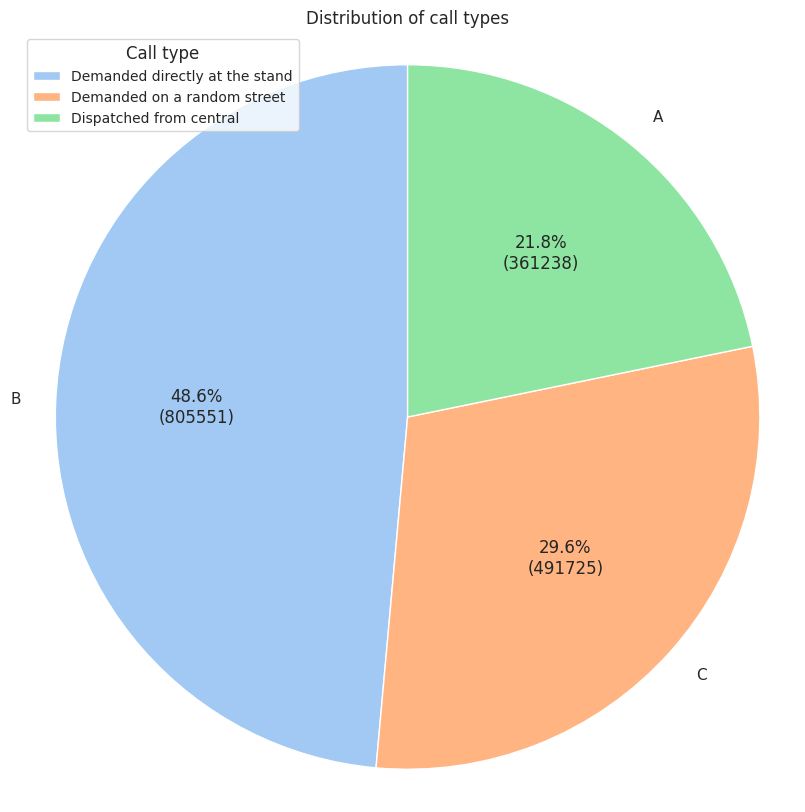

In [34]:
calltype_meaning = {
    "A": "Dispatched from central",
    "B": "Demanded directly at the stand",
    "C": "Demanded on a random street"
}
sns.set_theme(style="whitegrid", palette="pastel", context="notebook")

calltype_counts = df["CALL_TYPE"].value_counts()

def autopct_format(pct):
    total = sum(calltype_counts)
    count = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({count:d})"

plt.figure(figsize=(10, 10))
plt.pie(
    calltype_counts,
    labels=calltype_counts.index, # type: ignore
    autopct=autopct_format,
    startangle=90,
)
plt.axis("equal")
plt.title("Distribution of call types")
plt.legend(
    loc="upper left",
    labels=[calltype_meaning[calltype] for calltype in df["CALL_TYPE"].value_counts().index],
    title="Call type",
    fontsize=10,
)
plt.show()

In [ ]:
# For `CALL_TYPE` 'B', which `ORIGIN_STAND`s are the most popular? Which are underutilized?

# Filter for Holidays
stands_b = df[df["CALL_TYPE"] == "B"]["ORIGIN_STAND"]

# Count occurrences of each stand
stand_counts = stands_b.value_counts()

# Show the top 10 most popular stands
print("Most popular ORIGIN_STANDs for CALL_TYPE 'B':")
print(stand_counts.head(10))

# Show the 10 least used stands (underutilized)
print("\nLeast used ORIGIN_STANDs for CALL_TYPE 'B':")
print(stand_counts.tail(10))

# I've put a nice vizualization in the maps.ipynb notebook

Most popular ORIGIN_STANDs for CALL_TYPE 'B':
ORIGIN_STAND
15    79418
57    49834
9     34260
33    33658
23    32902
18    32479
53    31030
13    25417
12    25169
36    24444
Name: count, dtype: Int64

Least used ORIGIN_STANDs for CALL_TYPE 'B':
ORIGIN_STAND
39    1440
46    1292
44    1214
2     1166
4     1135
41     488
43     484
8      371
5       47
48       6
Name: count, dtype: Int64


In [36]:
# For `CALL_TYPE` 'A', are there regular callers?
caller_counts = df[df["CALL_TYPE"] == "A"]["ORIGIN_CALL"].value_counts()
caller_counts

ORIGIN_CALL
2002     57020
63882     6342
2001      2392
13168     1307
6728      1103
         ...  
19064        1
22639        1
51718        1
28477        1
60571        1
Name: count, Length: 56804, dtype: Int64

In [37]:
# On average, how many trips do they take?
caller_counts.mean()

np.float64(6.359376100274629)

In [38]:
caller_counts.describe()

count       56804.0
mean       6.359376
std      241.637092
min             1.0
25%             1.0
50%             2.0
75%             4.0
max         57020.0
Name: count, dtype: Float64

### Busiest Taxis

In [39]:
# Which TAXI_IDs are the most AND least active?
taxi_counts = df["TAXI_ID"].value_counts()
taxi_counts.head(10)

TAXI_ID
20000483    7596
20000307    7247
20000621    7242
20000403    7140
20000364    7129
20000492    7090
20000129    7064
20000424    6976
20000089    6923
20000529    6905
Name: count, dtype: Int64

In [40]:
taxi_counts.tail(10)

TAXI_ID
20000185    667
20000510    629
20000312    575
20000609    556
20000248    374
20000585    289
20000079     96
20000969     21
20000170      7
20000941      2
Name: count, dtype: Int64

### Temporal Analysis

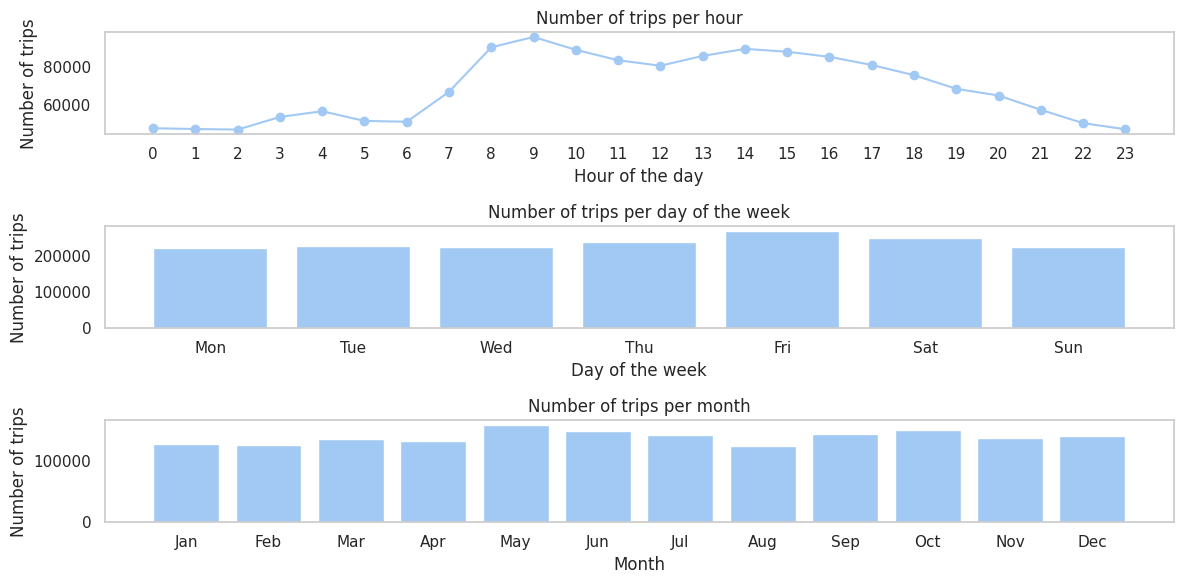

In [67]:
# How many trips occur per hour/day of the week/month?

series = df["TIMESTAMP"].map(lambda x: x[0])
# Extract the hour, day of the week, and month
df["HOUR"] = series.dt.hour
df["DAY_OF_WEEK"] = series.dt.dayofweek
df["MONTH"] = series.dt.month
# Count the number of trips per hour
hour_counts = df["HOUR"].value_counts().sort_index()
# Count the number of trips per day of the week
day_of_week_counts = df["DAY_OF_WEEK"].value_counts().sort_index()
# Count the number of trips per month
month_counts = df["MONTH"].value_counts().sort_index()
# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(hour_counts.index, hour_counts.values, marker="o")
plt.title("Number of trips per hour")
plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
plt.xticks(hour_counts.index)
plt.grid()
plt.subplot(3, 1, 2)
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.title("Number of trips per day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Number of trips")
plt.xticks(day_of_week_counts.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid()
plt.subplot(3, 1, 3)
plt.bar(month_counts.index, month_counts.values)
plt.title("Number of trips per month")
plt.xlabel("Month")
plt.ylabel("Number of trips")
plt.xticks(month_counts.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.tight_layout()
plt.show()

In [42]:
# Trip day distribution
trip_day_counts = df["DAY_TYPE"].value_counts()
trip_day_counts

DAY_TYPE
A    1540159
B      59964
C      58391
Name: count, dtype: int64

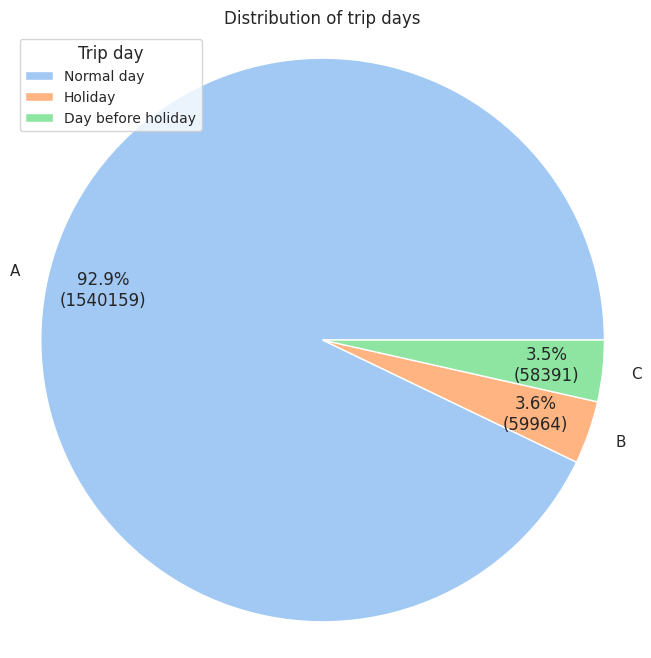

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(
    trip_day_counts,
    labels=trip_day_counts.index,
    autopct=autopct_format,
    pctdistance=0.8 
)
plt.axis("equal")
plt.title("Distribution of trip days")
plt.legend(
    loc="upper left",
    labels=["Normal day", "Holiday", "Day before holiday"],
    title="Trip day",
    fontsize=10,
)
plt.show()

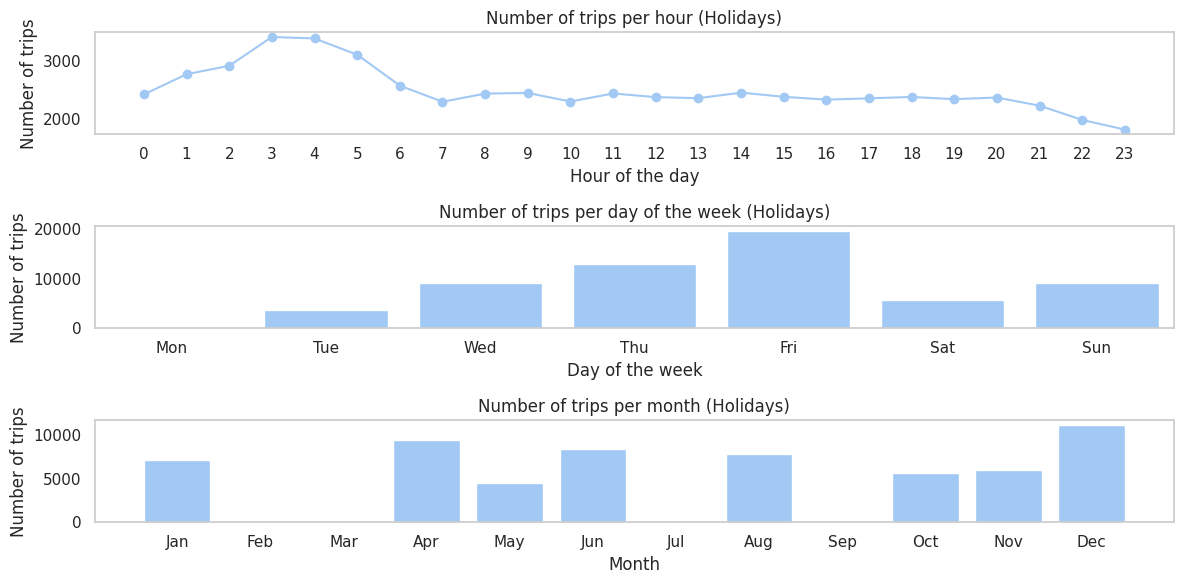

In [ ]:
# How many trips occur per hour/day of the week/month? for `CALL_TYPE` 'B'
df_b = df[df["DAY_TYPE"] == "B"].copy()
# Extract the hour, day of the week, and month
df_b["HOUR"] = df_b["TIMESTAMP"].map(lambda x: x[0]).dt.hour
df_b["DAY_OF_WEEK"] = df_b["TIMESTAMP"].map(lambda x: x[0]).dt.dayofweek
df_b["MONTH"] = df_b["TIMESTAMP"].map(lambda x: x[0]).dt.month
# Count the number of trips per hour
hour_counts_b = df_b["HOUR"].value_counts().sort_index()
# Count the number of trips per day of the week
day_of_week_counts_b = df_b["DAY_OF_WEEK"].value_counts().sort_index()
# Count the number of trips per month
month_counts_b = df_b["MONTH"].value_counts().sort_index()
# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(hour_counts_b.index, hour_counts_b.values, marker="o")
plt.title("Number of trips per hour (Holidays)")
plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
plt.xticks(hour_counts_b.index)
plt.grid()
plt.subplot(3, 1, 2)
plt.bar(day_of_week_counts_b.index, day_of_week_counts_b.values)
plt.title("Number of trips per day of the week (Holidays)")
plt.xlabel("Day of the week")
plt.ylabel("Number of trips")
plt.xlim(-0.5, 6.5)

# There's no monday in the data so add a placeholder
day_of_week_counts_b = day_of_week_counts_b.reindex(range(7), fill_value=0)
day_of_week_counts_b

plt.xticks(day_of_week_counts_b.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid()
plt.subplot(3, 1, 3)
plt.bar(month_counts_b.index, month_counts_b.values)
plt.title("Number of trips per month (Holidays)")
plt.xlabel("Month")
plt.ylabel("Number of trips")
# Missing 0 2 3 7 9
month_counts_b = month_counts_b.reindex(range(1, 13), fill_value=0)
plt.xticks(month_counts_b.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.tight_layout()
plt.show()


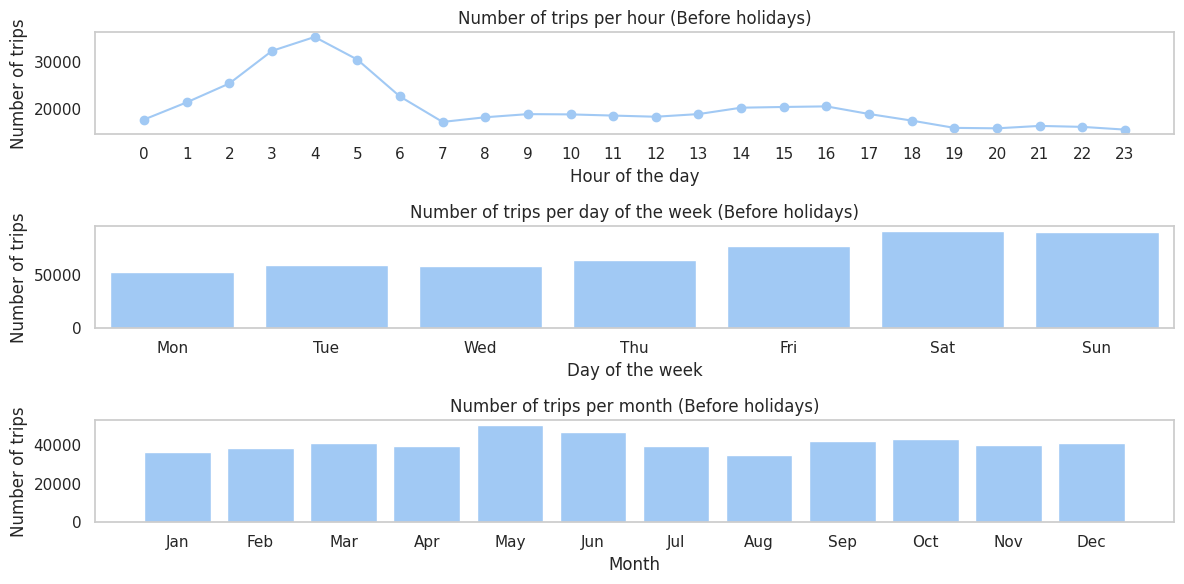

In [71]:
# Same thing for `CALL_TYPE` 'C'
df_c = df[df["CALL_TYPE"] == "C"].copy()
# Extract the hour, day of the week, and month
df_c["HOUR"] = df_c["TIMESTAMP"].map(lambda x: x[0]).dt.hour
df_c["DAY_OF_WEEK"] = df_c["TIMESTAMP"].map(lambda x: x[0]).dt.dayofweek
df_c["MONTH"] = df_c["TIMESTAMP"].map(lambda x: x[0]).dt.month
# Count the number of trips per hour
hour_counts_c = df_c["HOUR"].value_counts().sort_index()
# Count the number of trips per day of the week
day_of_week_counts_c = df_c["DAY_OF_WEEK"].value_counts().sort_index()
# Count the number of trips per month
month_counts_c = df_c["MONTH"].value_counts().sort_index()
# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(hour_counts_c.index, hour_counts_c.values, marker="o")
plt.title("Number of trips per hour (Before holidays)")
plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
plt.xticks(hour_counts_c.index)
plt.grid()
plt.subplot(3, 1, 2)
plt.bar(day_of_week_counts_c.index, day_of_week_counts_c.values)
plt.title("Number of trips per day of the week (Before holidays)")
plt.xlabel("Day of the week")
plt.ylabel("Number of trips")
plt.xlim(-0.5, 6.5)

day_of_week_counts_c = day_of_week_counts_c.reindex(range(7), fill_value=0)
day_of_week_counts_c
plt.xticks(day_of_week_counts_c.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid()
plt.subplot(3, 1, 3)
plt.bar(month_counts_c.index, month_counts_c.values)
plt.title("Number of trips per month (Before holidays)")
plt.xlabel("Month")
plt.ylabel("Number of trips")

month_counts_c = month_counts_c.reindex(range(1, 13), fill_value=0)
plt.xticks(month_counts_c.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.tight_layout()
plt.show()